In [3]:
from IPython.display import HTML
from numpy import arange
import matplotlib.pyplot as plt 

from transformers import AutoProcessor, AutoModel
from torch import cat, save
from decord import VideoReader, cpu
from tqdm import trange

from utils import compute_clip_sim, get_sample_frame_idx

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
model_name = "microsoft/xclip-base-patch16-zero-shot"
processor, model = AutoProcessor.from_pretrained(model_name), AutoModel.from_pretrained(model_name)

In [5]:
filename = input()
vr = VideoReader(filename, ctx=cpu(0))
print(len(vr), 'total frames')
HTML(f'<video controls> <source src="{filename}" type="video/mp4"> </video>')

 videos/aerial_small.mp4


6570 total frames


In [ ]:
idx, range_per_sample = get_sample_frame_idx(vr, 8)

video_features = []
for i in trange(0, len(idx)):
    # TO-DO  parellel processing
    frames = vr.get_batch(idx[i]).asnumpy()
    video_features.append(
        model.get_video_features(**processor(videos=list(frames), return_tensors="pt"))
    )
    
video_features = cat(video_features); video_features.shape

sample every 6 frames over 191 frames



 68%|██████▊   | 23/34 [00:36<00:31,  2.88s/it]

In [60]:
save(video_features, f'feature_vectors/{input()}.pt')

In [ ]:
text_features = model.get_text_features(**processor(text=["moving cars"], return_tensors="pt", padding=True))
logits = compute_clip_sim(video_features, text_features)
print(f'Content matching query found near {idx[logits.argmax()][0] // vr.get_avg_fps()}s')

sample_start_time = arange(len(idx)) * range_per_sample / vr.get_avg_fps()
plt.plot(sample_start_time, *logits); plt.grid()#which='both', axis='both')

Content matching query found near 223.0s


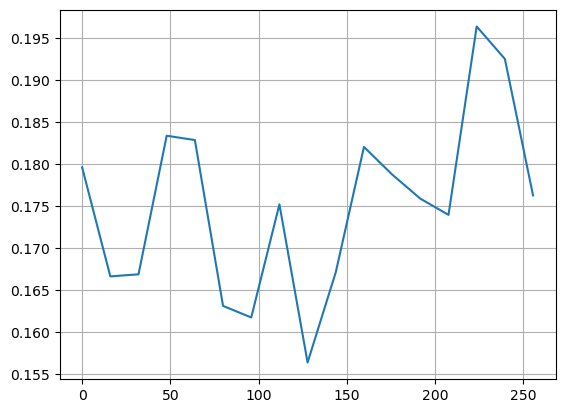

In [59]:
text_features = model.get_text_features(**processor(text=["docked ship"], return_tensors="pt", padding=True))
logits = compute_clip_sim(video_features, text_features)
print(f'Content matching query found near {idx[logits.argmax()][0] // vr.get_avg_fps()}s')

sample_start_time = arange(len(idx)) * range_per_sample / vr.get_avg_fps()
plt.plot(sample_start_time, *logits); plt.grid()#which='both', axis='both')

Content matching query found near 223.0s


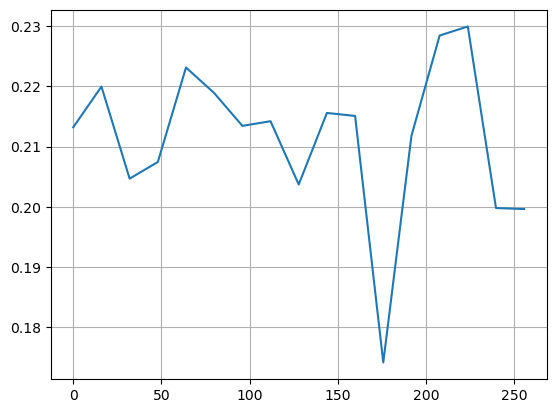

In [57]:
text_features = model.get_text_features(**processor(text=["tower"], return_tensors="pt", padding=True))
logits = compute_clip_sim(video_features, text_features)
print(f'Content matching query found near {idx[logits.argmax()][0] // vr.get_avg_fps()}s')

sample_start_time = arange(len(idx)) * range_per_sample / vr.get_avg_fps()
plt.plot(sample_start_time, *logits); plt.grid()#which='both', axis='both')